In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Get data

In [2]:
df = pd.read_csv('eu_taxation.csv')

In [3]:
df.head()

,country,perplexity,salaryaftertaxcalculator.com,relocate.me,average_salary
0,Austria,44250,43762.0,46114.0,64215
1,Belgium,39000,39478.0,41081.0,52962
2,Bulgaria,67500,NaN,NaN,53355
3,Croatia,54000,38100.0,43963.0,38492
4,Cyprus,60000,53803.0,54636.0,64711


## Plotting salary

In [4]:
df_sorted = df.sort_values('average_salary', ascending=False)

In [5]:
df_sorted.head()

,country,perplexity,salaryaftertaxcalculator.com,relocate.me,average_salary
13,Ireland,51000,50650.0,49488.0,97567
17,Luxembourg,51750,48000.0,49548.0,94559
6,Denmark,42000,NaN,50369.0,89145
19,Netherlands,48750,50963.0,45143.0,83681
10,Germany,46500,35935.0,43233.0,79622


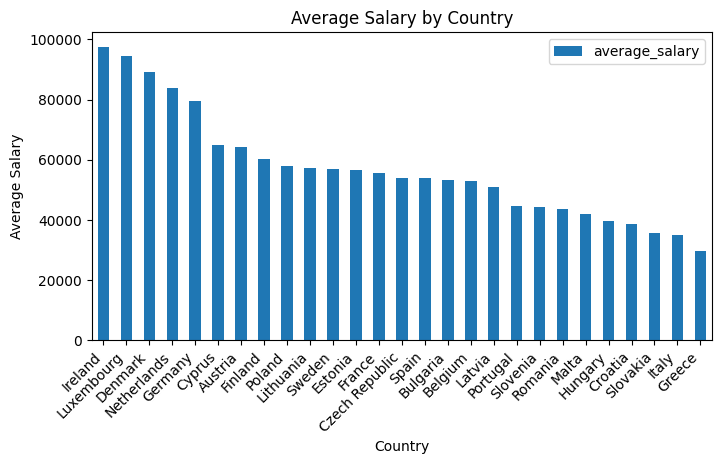

In [6]:
# Create the bar chart
ax = df_sorted.plot.bar(x='country', y='average_salary', figsize=(8, 4))

# Customize the chart
ax.set_xlabel('Country')
ax.set_ylabel('Average Salary')
ax.set_title('Average Salary by Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right');

In [7]:
quantiles = df['average_salary'].quantile([0.25, 0.5, 0.75, 0.90])

In [8]:
quantiles

0.25    44016.0
0.50    53945.0
0.75    62248.0
0.90    85866.6
Name: average_salary, dtype: float64

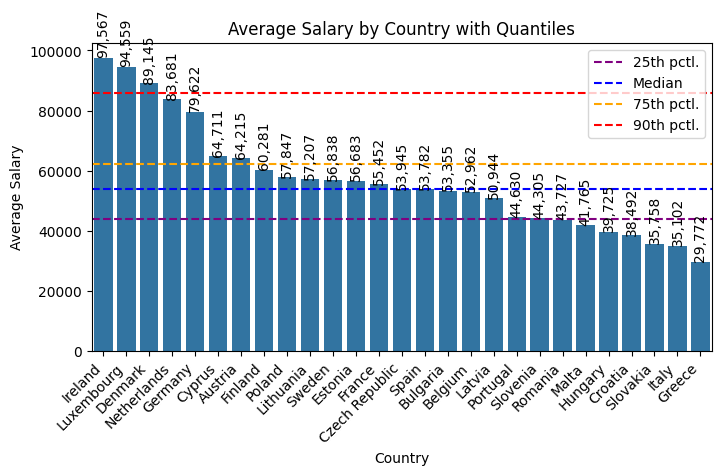

In [9]:
# Sort the dataframe by average salary in descending order
df_sorted = df.sort_values('average_salary', ascending=False)

# Compute quantiles
quantiles = df['average_salary'].quantile([0.25, 0.5, 0.75, 0.90])

# Create the bar chart
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='country', y='average_salary', data=df_sorted)

# Customize the chart
ax.set_xlabel('Country')
ax.set_ylabel('Average Salary')
ax.set_title('Average Salary by Country with Quantiles')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add quantile lines
colors = ['purple', 'blue', 'orange', 'red']
labels = ['25th pctl.', 'Median', '75th pctl.', '90th pctl.']
for (q, color, label) in zip(quantiles, colors, labels):
    plt.axhline(y=q, color=color, linestyle='--', label=label)

# Add value labels on top of each bar
for i, v in enumerate(df_sorted['average_salary']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', rotation=90)

# Add legend for quantile lines
plt.legend();

## Plotting taxes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       27 non-null     object 
 1   perplexity                    27 non-null     int64  
 2   salaryaftertaxcalculator.com  16 non-null     float64
 3   relocate.me                   17 non-null     float64
 4   average_salary                27 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ KB


### Fill `NA` values with `Perplexity` data

In [11]:
df.columns

Index(['country', 'perplexity', 'salaryaftertaxcalculator.com', 'relocate.me',
       'average_salary'],
      dtype='object')

In [12]:
fill_values = {col: df['perplexity'] for col in df.columns 
               if col in ['salaryaftertaxcalculator.com', 'relocate.me']}

In [13]:
df_filled = df.fillna(fill_values)

In [14]:
df.head()

,country,perplexity,salaryaftertaxcalculator.com,relocate.me,average_salary
0,Austria,44250,43762.0,46114.0,64215
1,Belgium,39000,39478.0,41081.0,52962
2,Bulgaria,67500,NaN,NaN,53355
3,Croatia,54000,38100.0,43963.0,38492
4,Cyprus,60000,53803.0,54636.0,64711


In [15]:
df_filled.head()

,country,perplexity,salaryaftertaxcalculator.com,relocate.me,average_salary
0,Austria,44250,43762.0,46114.0,64215
1,Belgium,39000,39478.0,41081.0,52962
2,Bulgaria,67500,67500.0,67500.0,53355
3,Croatia,54000,38100.0,43963.0,38492
4,Cyprus,60000,53803.0,54636.0,64711


### Add average column

In [16]:
columns_to_average = ['perplexity', 'salaryaftertaxcalculator.com', 'relocate.me']

In [17]:
df_filled['avg_net_salary'] = df_filled[columns_to_average].mean(axis=1).round(1)

In [18]:
df_filled.head()

,country,perplexity,salaryaftertaxcalculator.com,relocate.me,average_salary,avg_net_salary
0,Austria,44250,43762.0,46114.0,64215,44708.7
1,Belgium,39000,39478.0,41081.0,52962,39853.0
2,Bulgaria,67500,67500.0,67500.0,53355,67500.0
3,Croatia,54000,38100.0,43963.0,38492,45354.3
4,Cyprus,60000,53803.0,54636.0,64711,56146.3


### Compute effective taxes

In [19]:
GROSS_SALARY = 75000

In [20]:
df_filled['effective_tax'] = (GROSS_SALARY - df_filled['avg_net_salary']) / GROSS_SALARY

In [21]:
df_filled['effective_tax'] = df_filled['effective_tax'].round(2)

In [22]:
df_filled.columns

Index(['country', 'perplexity', 'salaryaftertaxcalculator.com', 'relocate.me',
       'average_salary', 'avg_net_salary', 'effective_tax'],
      dtype='object')

### Plotting

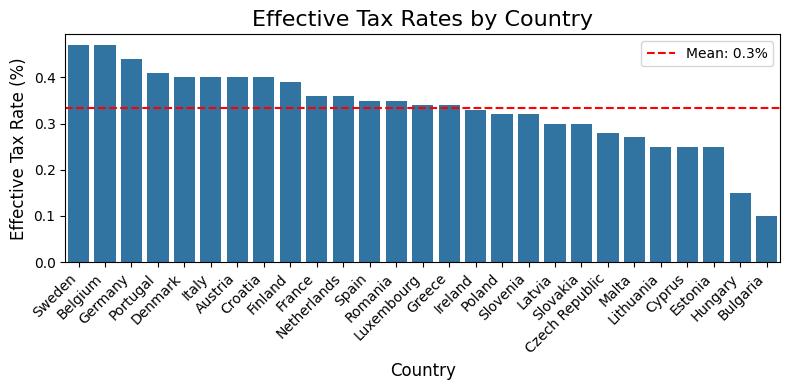

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by effective tax rate in descending order
df_sorted = df_filled.sort_values('effective_tax', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='country', y='effective_tax', data=df_sorted)

# Customize the chart
plt.title('Effective Tax Rates by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Effective Tax Rate (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
# for i, v in enumerate(df_sorted['effective_tax']):
#     ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

# Add mean line
mean_tax = df_sorted['effective_tax'].mean()
plt.axhline(y=mean_tax, color='r', linestyle='--', label=f'Mean: {mean_tax:.1f}%')

# Add legend
plt.legend()

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the chart
plt.show()

## Plotting net salary

In [24]:
df_filled.head()

,country,perplexity,salaryaftertaxcalculator.com,relocate.me,average_salary,avg_net_salary,effective_tax
0,Austria,44250,43762.0,46114.0,64215,44708.7,0.40
1,Belgium,39000,39478.0,41081.0,52962,39853.0,0.47
2,Bulgaria,67500,67500.0,67500.0,53355,67500.0,0.10
3,Croatia,54000,38100.0,43963.0,38492,45354.3,0.40
4,Cyprus,60000,53803.0,54636.0,64711,56146.3,0.25


In [25]:
df_filled['average_salary_after_tax'] = df_filled['average_salary'] * (1 - df_filled['effective_tax'])

In [26]:
df_filled.head()

,country,perplexity,salaryaftertaxcalculator.com,relocate.me,average_salary,avg_net_salary,effective_tax,average_salary_after_tax
0,Austria,44250,43762.0,46114.0,64215,44708.7,0.40,38529.00
1,Belgium,39000,39478.0,41081.0,52962,39853.0,0.47,28069.86
2,Bulgaria,67500,67500.0,67500.0,53355,67500.0,0.10,48019.50
3,Croatia,54000,38100.0,43963.0,38492,45354.3,0.40,23095.20
4,Cyprus,60000,53803.0,54636.0,64711,56146.3,0.25,48533.25


In [27]:
df_sorted = df_filled.sort_values('average_salary_after_tax', ascending=False)

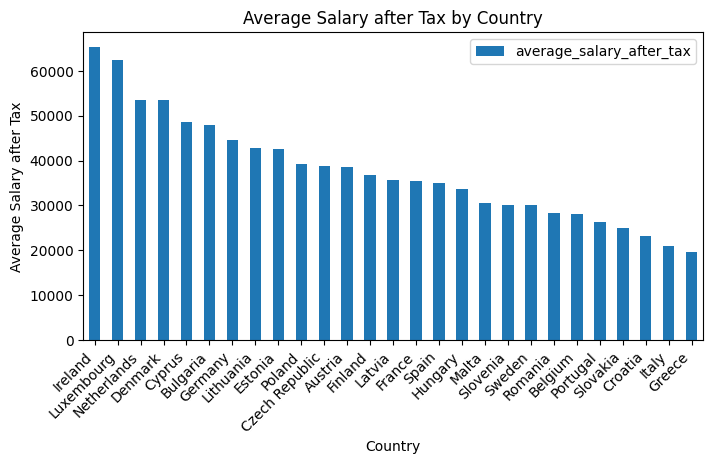

In [28]:
# Create the bar chart
ax = df_sorted.plot.bar(x='country', y='average_salary_after_tax', figsize=(8, 4))

# Customize the chart
ax.set_xlabel('Country')
ax.set_ylabel('Average Salary after Tax')
ax.set_title('Average Salary after Tax by Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right');